In [1]:
%matplotlib inline

The best c: 0.280000
The best score: 0.829114


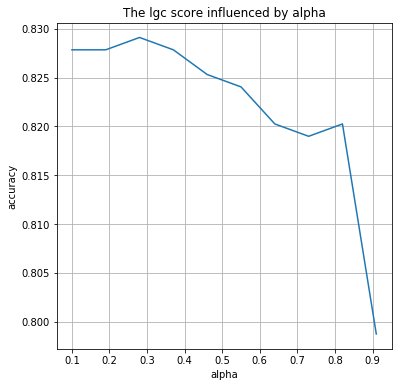

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances


def calculate_W(X, sigma, Y=None):
    dm = pairwise_distances(X, Y, metric='euclidean')
    W = rbf(dm, sigma)
    np.fill_diagonal(W, 0)  # 对角线全为 0
    return W


def one_hot(labels):
    '''
    对标签做 one_hot 编码

    参数
    =====
    n_classes: 
    '''
    label_dict = dict(enumerate(np.unique(labels)))
    n_classes = len(label_dict)  # 类别数
    index_dict = {v: k for k, v in label_dict.items()}
    Y = np.asanyarray([index_dict[label] for label in labels])
    out = Y[:, None] == np.arange(n_classes)
    return out.astype(float), label_dict


def rbf(x, sigma):
    return np.exp((-x) / (2 * sigma**2))


class LGC:
    def __init__(self, x_l, x_u, y_l, sigma, epochs):
        self._epochs = epochs
        self._X = np.concatenate([x_l, x_u])
        Y_l, self.label_dict = one_hot(y_l)
        self.labels = y_l
        self.n_classes = len(self.label_dict)
        Y_u = np.zeros((x_u.shape[0], self.n_classes))
        self._sigma = sigma
        self._input = np.concatenate([Y_l, Y_u])

    @property
    def sigma(self):
        return self._sigma

    @sigma.setter
    def sigma(self, value):
        return value

    @property
    def W(self):
        dm = pairwise_distances(self._X, metric='cosine')  # 余弦距离
        W = rbf(dm, self.sigma)
        np.fill_diagonal(W, 0)  # 对角线全为 0
        return W

    @property
    def D(self):
        # calculate D
        diago = np.sum(self.W, axis=1)
        return np.diag(diago)

    @property
    def S(self):
        d = np.sum(self.W, axis=1)
        # S 是 np.sqrt(np.dot(diag(D),diag(D)^T))
        S = np.sqrt(d * d[:, np.newaxis])
        return np.divide(self.W, S, where=S != 0)

    def fit(self, alpha):
        self.F = self._input
        for t in range(self._epochs):
            self.F = np.dot(self.S, self.F) * alpha + (1 - alpha) * self._input

    def score(self, y_u):
        return (self.F.argmax(1)[len(self.labels):] == y_u).mean()


def test_lgc(lgc_params):
    from matplotlib import pyplot as plt
    lc = np.arange(.1, 1, 0.09)
    lscore = []

    for c in lc:
        model = LGC(*lgc_params)
        model.fit(c)
        lscore.append(model.score(y_u))

    print("The best c: %f" % lc[np.argmax(np.array(lscore))])
    print("The best score: %f" % np.max(np.array(lscore)))
    plt.figure(figsize=(6, 6))
    plt.plot(lc, lscore)
    plt.title('The lgc score influenced by alpha')
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.grid()
    plt.show()


if __name__ == "__main__":
    from sklearn.datasets import make_moons
    n = 800  # 样本数
    n_labeled = 10  # 有标签样本数
    X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=1000)
    x_l, x_u = X[:n_labeled], X[n_labeled:]
    y_l, y_u = Y[:n_labeled], Y[n_labeled:]
    epochs = 200
    sigma = .2
    lgc_params = x_l, x_u, y_l, sigma, epochs
    test_lgc(lgc_params)

In [1]:
from mxnet import nd

In [2]:
a = nd.array([1, 2, 3, 4])

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances

In [8]:
pairwise_distances??